In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def generate_random_signal(n):
    """Generate a random discrete signal of length n."""
    return np.random.rand(n)

def dft(signal):
    N = len(signal)
    X = []
    for k in range(N):
        real = sum(signal[n] * np.cos(2 * np.pi * k * n / N) for n in range(N))
        imag = -sum(signal[n] * np.sin(2 * np.pi * k * n / N) for n in range(N))
        X.append(complex(real, imag))
    return X

def idft(X):
    N = len(X)
    signal = []
    for n in range(N):
        real = sum(X[k].real * np.cos(2 * np.pi * k * n / N) - X[k].imag * np.sin(2 * np.pi * k * n / N) for k in range(N))
        signal.append(real / N)
    return signal

# def fft(signal):
#     N = len(signal)
#     if N <= 1:
#         return signal
#     even = fft(signal[0::2])
#     odd = fft(signal[1::2])
#     T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# def ifft(spectrum):
#     N = len(spectrum)
#     if N <= 1:
#         return spectrum
#     even = ifft(spectrum[0::2])
#     odd = ifft(spectrum[1::2])
#     T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]

def fft(x):
    """
    Recursive implementation of the Fast Fourier Transform (FFT).
    Input:  Array of complex numbers x (length N).
    Output: Array of complex numbers representing the FFT of x.
    """
    N = len(x)
    
    # Step 1: Zero Padding (if necessary)
    if N & (N - 1) != 0:  # Check if N is not a power of 2
        next_power_of_2 = 1 << (N - 1).bit_length()  # Find the next power of 2
        x = np.pad(x, (0, next_power_of_2 - N))  # Pad with zeros
        N = next_power_of_2

    # Step 2: Base Case
    if N == 1:
        return x
    
    # Step 3: Divide the input array into even and odd indexed parts
    even = fft(x[::2])  # FFT of even indices
    odd = fft(x[1::2])  # FFT of odd indices
    
    # Step 5: Prepare the result array
    result = np.zeros(N, dtype=complex)
    
    # Step 6: Calculate the twiddle factors and combine the results
    for k in range(N // 2):
        twiddle_factor = np.exp(-2j * np.pi * k / N)
        result[k] = even[k] + twiddle_factor * odd[k]
        result[k + N // 2] = even[k] - twiddle_factor * odd[k]
    
    # Step 7: Return the combined result
    return result

def ifft(x):
    """
    Recursive implementation of the Inverse Fast Fourier Transform (IFFT).
    Input:  Array of complex numbers x (length N).
    Output: Array of complex numbers representing the IFFT of x.
    """
    N = len(x)

    # Step 1: Zero Padding (if necessary)
    if N & (N - 1) != 0:  # Check if N is not a power of 2
        next_power_of_2 = 1 << (N - 1).bit_length()  # Find the next power of 2
        x = np.pad(x, (0, next_power_of_2 - N))  # Pad with zeros
        N = next_power_of_2

    # Step 2: Base Case
    if N == 1:
        return x

    # Step 3: Divide the input array into even and odd indexed parts
    even = ifft(x[::2])  # IFFT of even indices
    odd = ifft(x[1::2])  # IFFT of odd indices

    # Step 5: Prepare the result array
    result = np.zeros(N, dtype=complex)

    # Step 6: Calculate the twiddle factors and combine the results
    for k in range(N // 2):
        twiddle_factor = np.exp(2j * np.pi * k / N)  # Conjugate of FFT twiddle factor
        result[k] = even[k] + twiddle_factor * odd[k]
        result[k + N // 2] = even[k] - twiddle_factor * odd[k]

    # Step 7: Normalize by dividing by N
    return result / 2



# Measure and Compare Runtime
def measure_runtime(n_values):
    dft_times = []
    fft_times = []
    idft_times = []
    ifft_times = []

    for n in n_values:
        signal = generate_random_signal(n)
        
        # Measure DFT Runtime
        dft_time = 0
        for _ in range(10):  # Run 10 times
            start = time.time()
            dft_result = dft(signal)
            dft_time += (time.time() - start)
        dft_times.append(dft_time / 10)
        
        # Measure IDFT Runtime
        idft_time = 0
        for _ in range(10):
            start = time.time()
            idft_result = idft(dft_result)
            idft_time += (time.time() - start)
        idft_times.append(idft_time / 10)

        # Measure FFT Runtime
        fft_time = 0
        for _ in range(10):
            start = time.time()
            fft_result = fft(signal)
            fft_time += (time.time() - start)
        fft_times.append(fft_time / 10)
        
        # Measure IFFT Runtime
        ifft_time = 0
        for _ in range(10):
            start = time.time()
            ifft_result = ifft(fft_result)
            ifft_time += (time.time() - start)
        ifft_times.append(ifft_time / 10)

    return dft_times, fft_times, idft_times, ifft_times

# Plot the results
n_values = [2**k for k in range(2, 12)]  # n = 4, 8, 16, ..., 1024
dft_times, fft_times, idft_times, ifft_times = measure_runtime(n_values)

plt.figure(figsize=(12, 6))
plt.plot(n_values, dft_times, label="DFT", marker='o')
plt.plot(n_values, fft_times, label="FFT", marker='o')
plt.plot(n_values, idft_times, label="IDFT", marker='o')
plt.plot(n_values, ifft_times, label="IFFT", marker='o')
plt.yscale('log')  # Logarithmic scale for better visualization
plt.xscale('log')
plt.xlabel("Number of Samples (n)")
plt.ylabel("Average Runtime (seconds)")
plt.title("Runtime Comparison of DFT/FFT and IDFT/IFFT")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

save_folder = "task2_plots"
os.makedirs(save_folder, exist_ok=True)

def generate_random_signal(n):
    """Generate a random discrete signal of length n."""
    return np.random.rand(n)

def dft(signal):
    N = len(signal)
    X = []
    for k in range(N):
        real = sum(signal[n] * np.cos(2 * np.pi * k * n / N) for n in range(N))
        imag = -sum(signal[n] * np.sin(2 * np.pi * k * n / N) for n in range(N))
        X.append(complex(real, imag))
    return X

def idft(X):
    N = len(X)
    signal = []
    for n in range(N):
        real = sum(X[k].real * np.cos(2 * np.pi * k * n / N) - X[k].imag * np.sin(2 * np.pi * k * n / N) for k in range(N))
        signal.append(real / N)
    return signal

# def fft(signal):
#     N = len(signal)
#     if N <= 1:
#         return signal
#     even = fft(signal[0::2])
#     odd = fft(signal[1::2])
#     T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# def ifft(spectrum):
#     N = len(spectrum)
#     if N <= 1:
#         return spectrum
#     even = ifft(spectrum[0::2])
#     odd = ifft(spectrum[1::2])
#     T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]

def fft(x):
    """
    Recursive implementation of the Fast Fourier Transform (FFT).
    Input:  Array of complex numbers x (length N).
    Output: Array of complex numbers representing the FFT of x.
    """
    N = len(x)
    
    # Step 1: Zero Padding (if necessary)
    if N & (N - 1) != 0:  # Check if N is not a power of 2
        next_power_of_2 = 1 << (N - 1).bit_length()  # Find the next power of 2
        x = np.pad(x, (0, next_power_of_2 - N))  # Pad with zeros
        N = next_power_of_2

    # Step 2: Base Case
    if N == 1:
        return x
    
    # Step 3: Divide the input array into even and odd indexed parts
    even = fft(x[::2])  # FFT of even indices
    odd = fft(x[1::2])  # FFT of odd indices
    
    # Step 5: Prepare the result array
    result = np.zeros(N, dtype=complex)
    
    # Step 6: Calculate the twiddle factors and combine the results
    for k in range(N // 2):
        twiddle_factor = np.exp(-2j * np.pi * k / N)
        result[k] = even[k] + twiddle_factor * odd[k]
        result[k + N // 2] = even[k] - twiddle_factor * odd[k]
    
    # Step 7: Return the combined result
    return result

def ifft(x):
    """
    Recursive implementation of the Inverse Fast Fourier Transform (IFFT).
    Input:  Array of complex numbers x (length N).
    Output: Array of complex numbers representing the IFFT of x.
    """
    N = len(x)

    # Step 1: Zero Padding (if necessary)
    if N & (N - 1) != 0:  # Check if N is not a power of 2
        next_power_of_2 = 1 << (N - 1).bit_length()  # Find the next power of 2
        x = np.pad(x, (0, next_power_of_2 - N))  # Pad with zeros
        N = next_power_of_2

    # Step 2: Base Case
    if N == 1:
        return x

    # Step 3: Divide the input array into even and odd indexed parts
    even = ifft(x[::2])  # IFFT of even indices
    odd = ifft(x[1::2])  # IFFT of odd indices

    # Step 5: Prepare the result array
    result = np.zeros(N, dtype=complex)

    # Step 6: Calculate the twiddle factors and combine the results
    for k in range(N // 2):
        twiddle_factor = np.exp(2j * np.pi * k / N)  # Conjugate of FFT twiddle factor
        result[k] = even[k] + twiddle_factor * odd[k]
        result[k + N // 2] = even[k] - twiddle_factor * odd[k]

    # Step 7: Normalize by dividing by N
    return result / 2



# Measure and Compare Runtime
def measure_runtime(n_values):
    dft_times = []
    fft_times = []
    idft_times = []
    ifft_times = []

    for n in n_values:
        signal = generate_random_signal(n)
        
        # Measure DFT Runtime
        dft_time = 0
        for _ in range(10):  # Run 10 times
            start = time.time()
            dft_result = dft(signal)
            dft_time += (time.time() - start)
        dft_times.append(dft_time / 10)
        
        # Measure IDFT Runtime
        idft_time = 0
        for _ in range(10):
            start = time.time()
            idft_result = idft(dft_result)
            idft_time += (time.time() - start)
        idft_times.append(idft_time / 10)

        # Measure FFT Runtime
        fft_time = 0
        for _ in range(10):
            start = time.time()
            fft_result = fft(signal)
            fft_time += (time.time() - start)
        fft_times.append(fft_time / 10)
        
        # Measure IFFT Runtime
        ifft_time = 0
        for _ in range(10):
            start = time.time()
            ifft_result = ifft(fft_result)
            ifft_time += (time.time() - start)
        ifft_times.append(ifft_time / 10)

    return dft_times, fft_times, idft_times, ifft_times

def plot_dft_fft(n_values, dft_times, fft_times,label1="DFT",label2="FFT"):
    plt.figure(figsize=(12, 6))
    plt.plot(n_values, dft_times, label=label1, marker='o', linestyle='-', color='blue')
    plt.plot(n_values, fft_times, label=label2, marker='o', linestyle='--', color='red')
    plt.title(f"{label1} vs {label2} Runtime Comparison")
    plt.xlabel("Signal Length (n)")
    plt.ylabel("Runtime (s)")
    # plt.xscale("log")
    plt.yscale("log")
    plt.xticks(n_values, [f"$2^{int(np.log2(n))}$" for n in n_values])
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    # plt.show()
    plt.savefig(f"{save_folder}/{label1}_vs_{label2}.png")
    plt.close()

# Plot the results
n_values = [2**k for k in range(2, 12)]  # n = 4, 8, 16, ..., 1024
dft_times, fft_times, idft_times, ifft_times = measure_runtime(n_values)
# print(dft_times)
# print(fft_times)
plot_dft_fft(n_values, dft_times, fft_times)
plot_dft_fft(n_values, idft_times, ifft_times,label1="IDFT",label2="IFFT")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

save_folder = "task2_plots"
os.makedirs(save_folder, exist_ok=True)

def generate_random_signal(n):
    """Generate a random discrete signal of length n."""
    return np.random.rand(n)

def dft(signal):
    N = len(signal)
    X = []
    for k in range(N):
        real = sum(signal[n] * np.cos(2 * np.pi * k * n / N) for n in range(N))
        imag = -sum(signal[n] * np.sin(2 * np.pi * k * n / N) for n in range(N))
        X.append(complex(real, imag))
    return X

def idft(X):
    N = len(X)
    signal = []
    for n in range(N):
        real = sum(X[k].real * np.cos(2 * np.pi * k * n / N) - X[k].imag * np.sin(2 * np.pi * k * n / N) for k in range(N))
        signal.append(real / N)
    return signal

# def fft(signal):
#     N = len(signal)
#     if N <= 1:
#         return signal
#     even = fft(signal[0::2])
#     odd = fft(signal[1::2])
#     T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# def ifft(spectrum):
#     N = len(spectrum)
#     if N <= 1:
#         return spectrum
#     even = ifft(spectrum[0::2])
#     odd = ifft(spectrum[1::2])
#     T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]

def fft(x):
    """
    Recursive implementation of the Fast Fourier Transform (FFT).
    Input:  Array of complex numbers x (length N).
    Output: Array of complex numbers representing the FFT of x.
    """
    N = len(x)
    
    # Step 1: Zero Padding (if necessary)
    if N & (N - 1) != 0:  # Check if N is not a power of 2
        next_power_of_2 = 1 << (N - 1).bit_length()  # Find the next power of 2
        x = np.pad(x, (0, next_power_of_2 - N))  # Pad with zeros
        N = next_power_of_2

    # Step 2: Base Case
    if N == 1:
        return x
    
    # Step 3: Divide the input array into even and odd indexed parts
    even = fft(x[::2])  # FFT of even indices
    odd = fft(x[1::2])  # FFT of odd indices
    
    # Step 5: Prepare the result array
    result = np.zeros(N, dtype=complex)
    
    # Step 6: Calculate the twiddle factors and combine the results
    for k in range(N // 2):
        twiddle_factor = np.exp(-2j * np.pi * k / N)
        result[k] = even[k] + twiddle_factor * odd[k]
        result[k + N // 2] = even[k] - twiddle_factor * odd[k]
    
    # Step 7: Return the combined result
    return result

def ifft(x):
    """
    Recursive implementation of the Inverse Fast Fourier Transform (IFFT).
    Input:  Array of complex numbers x (length N).
    Output: Array of complex numbers representing the IFFT of x.
    """
    N = len(x)

    # Step 1: Zero Padding (if necessary)
    if N & (N - 1) != 0:  # Check if N is not a power of 2
        next_power_of_2 = 1 << (N - 1).bit_length()  # Find the next power of 2
        x = np.pad(x, (0, next_power_of_2 - N))  # Pad with zeros
        N = next_power_of_2

    # Step 2: Base Case
    if N == 1:
        return x

    # Step 3: Divide the input array into even and odd indexed parts
    even = ifft(x[::2])  # IFFT of even indices
    odd = ifft(x[1::2])  # IFFT of odd indices

    # Step 5: Prepare the result array
    result = np.zeros(N, dtype=complex)

    # Step 6: Calculate the twiddle factors and combine the results
    for k in range(N // 2):
        twiddle_factor = np.exp(2j * np.pi * k / N)  # Conjugate of FFT twiddle factor
        result[k] = even[k] + twiddle_factor * odd[k]
        result[k + N // 2] = even[k] - twiddle_factor * odd[k]

    # Step 7: Normalize by dividing by N
    return result / 2



# Measure and Compare Runtime
def measure_runtime(n_values):
    dft_times = []
    fft_times = []
    idft_times = []
    ifft_times = []

    total_times = 10

    for n in n_values:
        signal = generate_random_signal(n)
        
        # Measure DFT Runtime
        dft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            dft_result = dft(signal)
            dft_time += (time.perf_counter() - start)
        dft_times.append(dft_time / total_times)
        
        # Measure IDFT Runtime
        idft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            idft_result = idft(dft_result)
            idft_time += (time.perf_counter() - start)
        idft_times.append(idft_time / total_times)

        # Measure FFT Runtime
        fft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            fft_result = fft(signal)
            fft_time += (time.perf_counter() - start)
        fft_times.append(fft_time / total_times)
        
        # Measure IFFT Runtime
        ifft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            ifft_result = ifft(fft_result)
            ifft_time += (time.perf_counter() - start)
        ifft_times.append(ifft_time / total_times)

    return dft_times, fft_times, idft_times, ifft_times

def plot_dft_fft(n_values, dft_times, fft_times,label1="DFT",label2="FFT"):
    plt.figure(figsize=(12, 6))
    plt.plot(n_values, dft_times, label=label1, marker='o', linestyle='-', color='blue')
    plt.plot(n_values, fft_times, label=label2, marker='o', linestyle='--', color='red')
    plt.title(f"{label1} vs {label2} Runtime Comparison")
    plt.xlabel("Signal Length (n)")
    plt.ylabel("Runtime (s)")
    plt.xscale("log")
    plt.yscale("log")
    plt.xticks(n_values, [rf"$2^{int(np.log2(n))}$" for n in n_values])
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    # plt.show()
    plt.savefig(f"{save_folder}/{label1}_vs_{label2}.png")
    plt.close()

# Plot the results
n_values = [2**k for k in range(2, 12)]  # n = 4, 8, 16, ..., 1024
dft_times, fft_times, idft_times, ifft_times = measure_runtime(n_values)
print(dft_times)
print(fft_times)
plot_dft_fft(n_values, dft_times, fft_times)
plot_dft_fft(n_values, idft_times, ifft_times,label1="IDFT",label2="IFFT")



[7.811999967088923e-05, 0.0002785799999401206, 0.0006326799997623311, 0.0023567000003822613, 0.010117800000443822, 0.03542087999958312, 0.14222177999945415, 0.541613609999331, 2.2329237400008424, 8.919474269999773]
[2.7520000730874018e-05, 3.5309999657329175e-05, 7.392999941657763e-05, 0.00022009000058460516, 0.0003800099995714845, 0.0008566899996367283, 0.0018858600004023173, 0.004561869999452029, 0.010158340000998578, 0.02065890999874682]


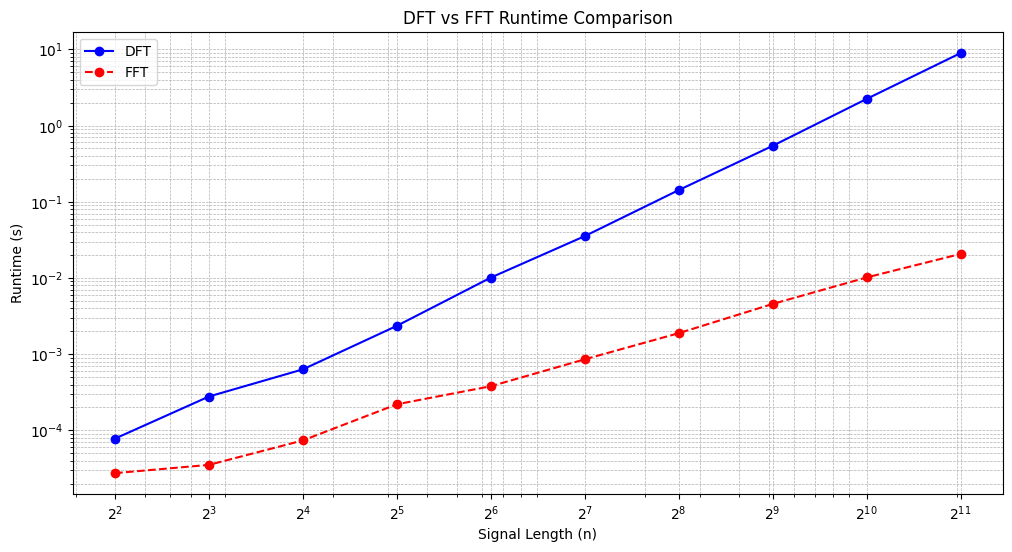

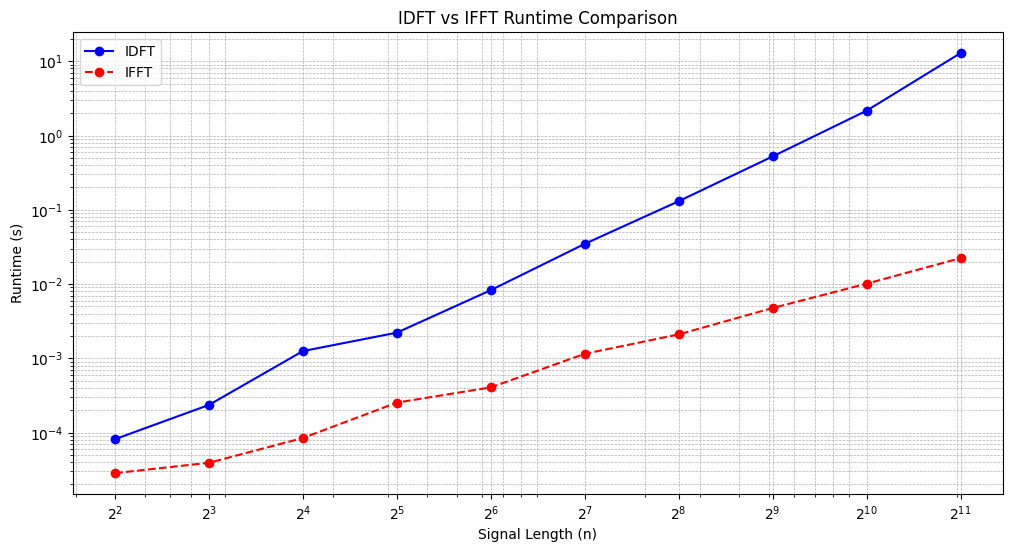

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

save_folder = "task2_plots"
os.makedirs(save_folder, exist_ok=True)

def generate_random_signal(n):
    """Generate a random discrete signal of length n."""
    return np.random.rand(n)

def dft(signal):
    N = len(signal)
    X = []
    for k in range(N):
        real = sum(signal[n] * np.cos(2 * np.pi * k * n / N) for n in range(N))
        imag = -sum(signal[n] * np.sin(2 * np.pi * k * n / N) for n in range(N))
        X.append(complex(real, imag))
    return X

def idft(X):
    N = len(X)
    signal = []
    for n in range(N):
        real = sum(X[k].real * np.cos(2 * np.pi * k * n / N) - X[k].imag * np.sin(2 * np.pi * k * n / N) for k in range(N))
        signal.append(real / N)
    return signal

# def fft(signal):
#     N = len(signal)
#     if N <= 1:
#         return signal
#     even = fft(signal[0::2])
#     odd = fft(signal[1::2])
#     T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# def ifft(spectrum):
#     N = len(spectrum)
#     if N <= 1:
#         return spectrum
#     even = ifft(spectrum[0::2])
#     odd = ifft(spectrum[1::2])
#     T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]

def fft(x):
    """
    Recursive implementation of the Fast Fourier Transform (FFT).
    Input:  Array of complex numbers x (length N).
    Output: Array of complex numbers representing the FFT of x.
    """
    N = len(x)
    
    # Step 1: Zero Padding (if necessary)
    if N & (N - 1) != 0:  # Check if N is not a power of 2
        next_power_of_2 = 1 << (N - 1).bit_length()  # Find the next power of 2
        x = np.pad(x, (0, next_power_of_2 - N))  # Pad with zeros
        N = next_power_of_2

    # Step 2: Base Case
    if N == 1:
        return x
    
    # Step 3: Divide the input array into even and odd indexed parts
    even = fft(x[::2])  # FFT of even indices
    odd = fft(x[1::2])  # FFT of odd indices
    
    # Step 5: Prepare the result array
    result = np.zeros(N, dtype=complex)
    
    # Step 6: Calculate the twiddle factors and combine the results
    for k in range(N // 2):
        twiddle_factor = np.exp(-2j * np.pi * k / N)
        result[k] = even[k] + twiddle_factor * odd[k]
        result[k + N // 2] = even[k] - twiddle_factor * odd[k]
    
    # Step 7: Return the combined result
    return result

def ifft(x):
    """
    Recursive implementation of the Inverse Fast Fourier Transform (IFFT).
    Input:  Array of complex numbers x (length N).
    Output: Array of complex numbers representing the IFFT of x.
    """
    N = len(x)

    # Step 1: Zero Padding (if necessary)
    if N & (N - 1) != 0:  # Check if N is not a power of 2
        next_power_of_2 = 1 << (N - 1).bit_length()  # Find the next power of 2
        x = np.pad(x, (0, next_power_of_2 - N))  # Pad with zeros
        N = next_power_of_2

    # Step 2: Base Case
    if N == 1:
        return x

    # Step 3: Divide the input array into even and odd indexed parts
    even = ifft(x[::2])  # IFFT of even indices
    odd = ifft(x[1::2])  # IFFT of odd indices

    # Step 5: Prepare the result array
    result = np.zeros(N, dtype=complex)

    # Step 6: Calculate the twiddle factors and combine the results
    for k in range(N // 2):
        twiddle_factor = np.exp(2j * np.pi * k / N)  # Conjugate of FFT twiddle factor
        result[k] = even[k] + twiddle_factor * odd[k]
        result[k + N // 2] = even[k] - twiddle_factor * odd[k]

    # Step 7: Normalize by dividing by N
    return result / 2



# Measure and Compare Runtime
def measure_runtime(n_values):
    dft_times = []
    fft_times = []
    idft_times = []
    ifft_times = []

    total_times = 10

    for n in n_values:
        signal = generate_random_signal(n)
        
        # Measure DFT Runtime
        dft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            dft_result = dft(signal)
            dft_time += (time.perf_counter() - start)
        dft_times.append(dft_time / total_times)
        
        # Measure IDFT Runtime
        idft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            idft_result = idft(dft_result)
            idft_time += (time.perf_counter() - start)
        idft_times.append(idft_time / total_times)

        # Measure FFT Runtime
        fft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            fft_result = fft(signal)
            fft_time += (time.perf_counter() - start)
        fft_times.append(fft_time / total_times)
        
        # Measure IFFT Runtime
        ifft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            ifft_result = ifft(fft_result)
            ifft_time += (time.perf_counter() - start)
        ifft_times.append(ifft_time / total_times)

    return dft_times, fft_times, idft_times, ifft_times

def plot_dft_fft(n_values, dft_times, fft_times,label1="DFT",label2="FFT"):
    plt.figure(figsize=(12, 6))
    plt.plot(n_values, dft_times, label=label1, marker='o', linestyle='-', color='blue')
    plt.plot(n_values, fft_times, label=label2, marker='o', linestyle='--', color='red')
    plt.title(f"{label1} vs {label2} Runtime Comparison")
    plt.xlabel("Signal Length (n)")
    plt.ylabel("Runtime (s)")
    plt.xscale("log")
    plt.yscale("log")
    log_n_values = np.log2(n_values)
    plt.xticks(n_values, [f"$2^{{{int(log_n)}}}$" for log_n in log_n_values])
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()
    # plt.savefig(f"{save_folder}/{label1}_vs_{label2}.png")
    # plt.close()

# Plot the results
n_values = [2**k for k in range(2, 12)]  # n = 4, 8, 16, ..., 1024
dft_times, fft_times, idft_times, ifft_times = measure_runtime(n_values)
print(dft_times)
print(fft_times)
plot_dft_fft(n_values, dft_times, fft_times)
plot_dft_fft(n_values, idft_times, ifft_times,label1="IDFT",label2="IFFT")



[7.840000034775585e-05, 0.00015440000061062165, 0.0005882000004930887, 0.0031532000029983465, 0.009678300000814488, 0.03626879999865196, 0.15412520000245422, 0.6026677000008931, 2.506740400000126]
[3.170000127283856e-05, 3.260000084992498e-05, 7.090000144671649e-05, 0.0002993000016431324, 0.00040380000064033084, 0.0008481999975629151, 0.0018481000006431714, 0.004108999997697538, 0.008785400001215748]


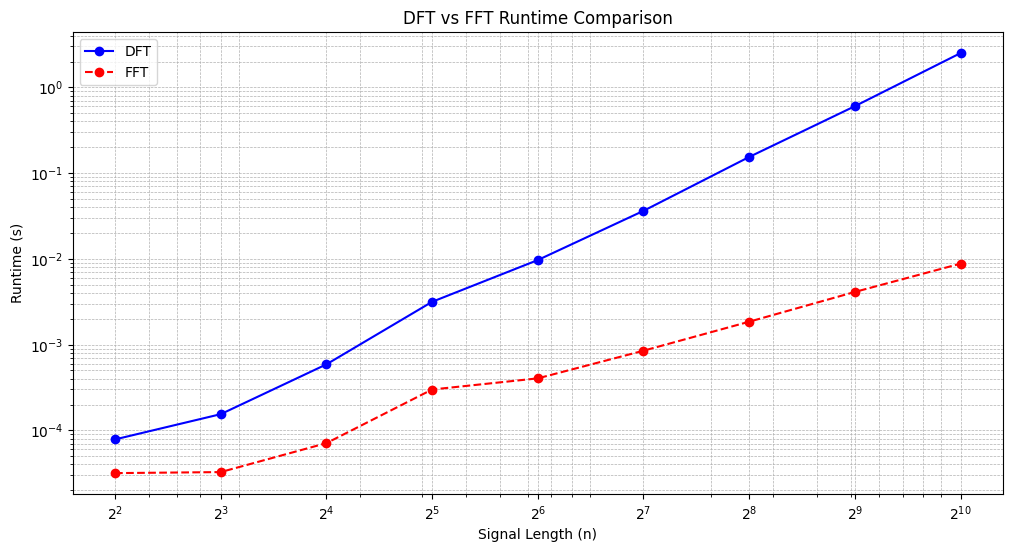

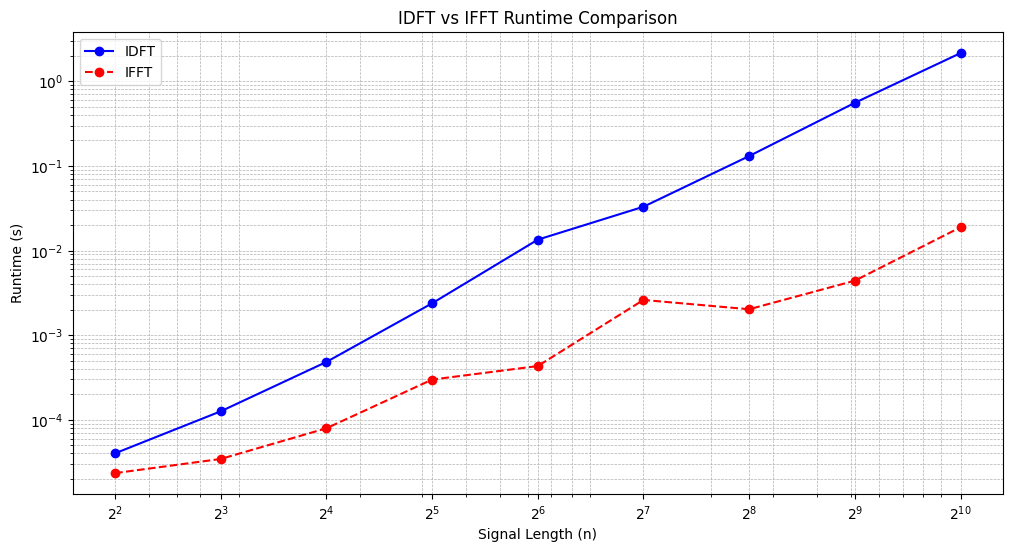

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

save_folder = "task2_plots"
os.makedirs(save_folder, exist_ok=True)

def generate_random_signal(n):
    """Generate a random discrete signal of length n."""
    # return np.random.rand(n)
    return np.arange(n)

def dft(signal):
    N = len(signal)
    X = []
    for k in range(N):
        real = sum(signal[n] * np.cos(2 * np.pi * k * n / N) for n in range(N))
        imag = -sum(signal[n] * np.sin(2 * np.pi * k * n / N) for n in range(N))
        X.append(complex(real, imag))
    return X

def idft(X):
    N = len(X)
    signal = []
    for n in range(N):
        real = sum(X[k].real * np.cos(2 * np.pi * k * n / N) - X[k].imag * np.sin(2 * np.pi * k * n / N) for k in range(N))
        signal.append(real / N)
    return signal

# def fft(signal):
#     N = len(signal)
#     if N <= 1:
#         return signal
#     even = fft(signal[0::2])
#     odd = fft(signal[1::2])
#     T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# def ifft(spectrum):
#     N = len(spectrum)
#     if N <= 1:
#         return spectrum
#     even = ifft(spectrum[0::2])
#     odd = ifft(spectrum[1::2])
#     T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]

def fft(x):
    """
    Recursive implementation of the Fast Fourier Transform (FFT).
    Input:  Array of complex numbers x (length N).
    Output: Array of complex numbers representing the FFT of x.
    """
    N = len(x)
    
    # Step 1: Zero Padding (if necessary)
    if N & (N - 1) != 0:  # Check if N is not a power of 2
        next_power_of_2 = 1 << (N - 1).bit_length()  # Find the next power of 2
        x = np.pad(x, (0, next_power_of_2 - N))  # Pad with zeros
        N = next_power_of_2

    # Step 2: Base Case
    if N == 1:
        return x
    
    # Step 3: Divide the input array into even and odd indexed parts
    even = fft(x[::2])  # FFT of even indices
    odd = fft(x[1::2])  # FFT of odd indices
    
    # Step 5: Prepare the result array
    result = np.zeros(N, dtype=complex)
    
    # Step 6: Calculate the twiddle factors and combine the results
    for k in range(N // 2):
        twiddle_factor = np.exp(-2j * np.pi * k / N)
        result[k] = even[k] + twiddle_factor * odd[k]
        result[k + N // 2] = even[k] - twiddle_factor * odd[k]
    
    # Step 7: Return the combined result
    return result

def ifft(x):
    """
    Recursive implementation of the Inverse Fast Fourier Transform (IFFT).
    Input:  Array of complex numbers x (length N).
    Output: Array of complex numbers representing the IFFT of x.
    """
    N = len(x)

    # Step 1: Zero Padding (if necessary)
    if N & (N - 1) != 0:  # Check if N is not a power of 2
        next_power_of_2 = 1 << (N - 1).bit_length()  # Find the next power of 2
        x = np.pad(x, (0, next_power_of_2 - N))  # Pad with zeros
        N = next_power_of_2

    # Step 2: Base Case
    if N == 1:
        return x

    # Step 3: Divide the input array into even and odd indexed parts
    even = ifft(x[::2])  # IFFT of even indices
    odd = ifft(x[1::2])  # IFFT of odd indices

    # Step 5: Prepare the result array
    result = np.zeros(N, dtype=complex)

    # Step 6: Calculate the twiddle factors and combine the results
    for k in range(N // 2):
        twiddle_factor = np.exp(2j * np.pi * k / N)  # Conjugate of FFT twiddle factor
        result[k] = even[k] + twiddle_factor * odd[k]
        result[k + N // 2] = even[k] - twiddle_factor * odd[k]

    # Step 7: Normalize by dividing by N
    return result / 2



# Measure and Compare Runtime
def measure_runtime(n_values):
    dft_times = []
    fft_times = []
    idft_times = []
    ifft_times = []

    total_times = 1

    for n in n_values:
        signal = generate_random_signal(n)
        
        # Measure DFT Runtime
        dft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            dft_result = dft(signal)
            dft_time += (time.perf_counter() - start)
        dft_times.append(dft_time / total_times)
        
        # Measure IDFT Runtime
        idft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            idft_result = idft(dft_result)
            idft_time += (time.perf_counter() - start)
        idft_times.append(idft_time / total_times)

        # Measure FFT Runtime
        fft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            fft_result = fft(signal)
            fft_time += (time.perf_counter() - start)
        fft_times.append(fft_time / total_times)
        
        # Measure IFFT Runtime
        ifft_time = 0
        for _ in range(total_times):
            start = time.perf_counter()
            ifft_result = ifft(fft_result)
            ifft_time += (time.perf_counter() - start)
        ifft_times.append(ifft_time / total_times)

    return dft_times, fft_times, idft_times, ifft_times

def plot_dft_fft(n_values, dft_times, fft_times,label1="DFT",label2="FFT"):
    plt.figure(figsize=(12, 6))
    plt.plot(n_values, dft_times, label=label1, marker='o', linestyle='-', color='blue')
    plt.plot(n_values, fft_times, label=label2, marker='o', linestyle='--', color='red')
    plt.title(f"{label1} vs {label2} Runtime Comparison")
    plt.xlabel("Signal Length (n)")
    plt.ylabel("Runtime (s)")
    plt.xscale("log")
    plt.yscale("log")
    log_n_values = np.log2(n_values)
    plt.xticks(n_values, [f"$2^{{{int(log_n)}}}$" for log_n in log_n_values])
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()
    # plt.savefig(f"{save_folder}/{label1}_vs_{label2}.png")
    # plt.close()

# Plot the results
n_values = [2**k for k in range(2, 11)]  # n = 4, 8, 16, ..., 1024
dft_times, fft_times, idft_times, ifft_times = measure_runtime(n_values)
print(dft_times)
print(fft_times)
plot_dft_fft(n_values, dft_times, fft_times)
plot_dft_fft(n_values, idft_times, ifft_times,label1="IDFT",label2="IFFT")

